# 442 Poisson Fit

In [2]:

import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
%matplotlib inline

from ROOT import TCanvas, TGraphErrors, TF1, TH1F, gStyle
from ROOT import gROOT
from array import array

Welcome to JupyROOT 6.16/00


In [3]:
def getValues(filename):
    try:
        file = open(filename, 'r')
    except IOError:
        print "Problem with the", filename
    values =[]
    for line in file:
        values.append(int(line))
    return values    

In [4]:
values = getValues('cs10s.txt')
print values

[92, 91, 94, 103, 79, 83, 123, 108, 91, 84, 102, 98, 90, 90, 83, 91, 89, 110, 94, 97, 102, 104, 103, 96, 98, 96, 98, 74, 80, 81, 88, 115, 87, 90, 113, 95, 96, 86, 98, 92, 83, 105, 93, 108, 115, 99, 86, 112, 89, 103, 97, 94, 81, 102, 94, 93, 89, 87, 90, 108, 94, 80, 106, 92, 107, 101, 98, 98, 100, 113, 102, 108, 110, 89, 106, 104, 90, 108, 80, 93, 110, 95, 99, 108, 93, 106, 93, 88, 89, 98, 86, 102, 96, 113, 89, 105, 89, 98, 89, 104]


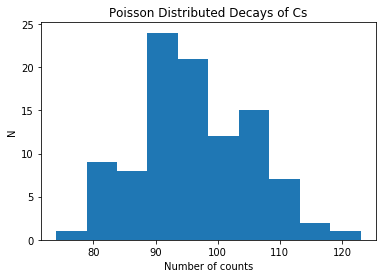

In [5]:

x = plt.figure()
plt.hist(values,10)
plt.ylabel("N")
plt.xlabel("Number of counts")
plt.title("Poisson Distributed Decays of Cs")
plt.show()
x.savefig('cs10.eps',format='eps',dpi=1000)

Info in <TCanvas::Print>: eps file cs10_1.eps has been created


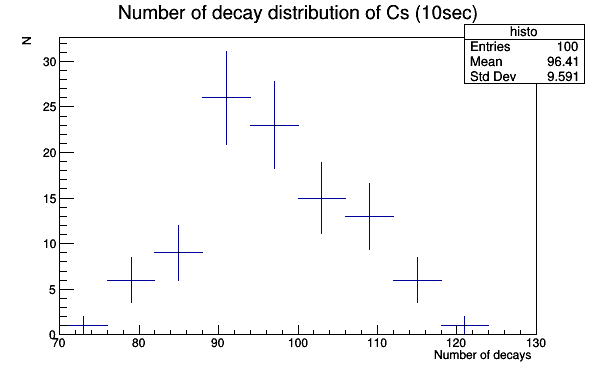

In [6]:
#Create a canvas to draw your histograms and functions
c1 = TCanvas( 'c1', 'Poisson Graph', 200, 10, 600, 400 ) 

#define a histogram with 20 bins between 60-120 (Change these values according to your data sets!!!)
histo = TH1F("histo", "Number of decay distribution of Cs (10sec)", 10, 70, 130) 

#Label the X-Y axis
histo.GetYaxis().SetTitle("N")
histo.GetXaxis ().SetTitle ("Number of decays ");

#Fill the randomly generated data into your histogram
for data_point in values:
    histo.Fill(data_point)

#Draw your histogram with error bars and draw it on the canvas
histo.Draw("E")
c1.Draw()
c1.SaveAs("cs10_1.eps")

 FCN=4.46137 FROM MINOS     STATUS=SUCCESSFUL     20 CALLS          91 TOTAL
                     EDM=2.07308e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.76341e+02   5.89656e+01  -5.90669e+00  -9.08010e-06
   2  p1           9.69107e+01   1.06728e+00   1.06728e+00  -5.34401e-08


Info in <TCanvas::Print>: eps file cs10_1.eps has been created


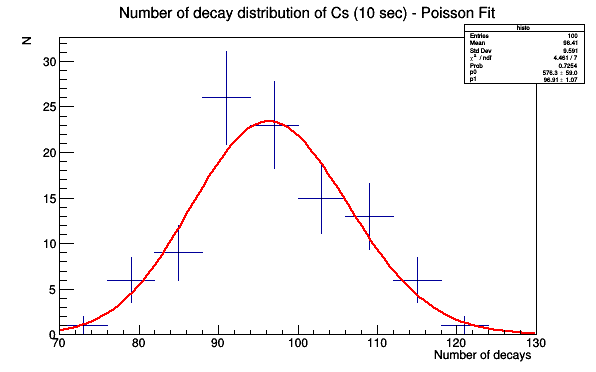

In [7]:
# Define the Poisson function from TMath library in ROOT to fit with two parameters:
#[0]: normalizing constant
#[1]: mean
fpois = TF1("fpois","[0]*TMath::Poisson(x,[1])",70,130) #(Change interval values (60,120) according to your data sets!!!)

#Set the parameters to guide the ROOT fitter to converge easily and fit your histogram
fpois.SetParameters(10, 100) # give reasonable estimates for your parameters to guide ROOT fit to converge
fpois.SetFillColor(41);
histo.Fit("fpois", "E")
histo.SetTitle("Number of decay distribution of Cs (10 sec) - Poisson Fit")
#Set the options to display fit parameters and chi_squared value on the graph
gStyle.SetOptFit(1111)

c1.Draw()
c1.SaveAs("cs10_1.eps")

 FCN=4.59096 FROM MINOS     STATUS=SUCCESSFUL     49 CALLS         212 TOTAL
                     EDM=3.87928e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.28595e+01   2.89807e+00   1.00497e-02  -4.97887e-06
   2  Mean         9.68851e+01   1.06770e+00  -1.60581e-03   8.98441e-07
   3  Sigma        1.00550e+01   7.95328e-01   7.95328e-01  -4.19245e-03


Info in <TCanvas::Print>: eps file cs10_1.eps has been created


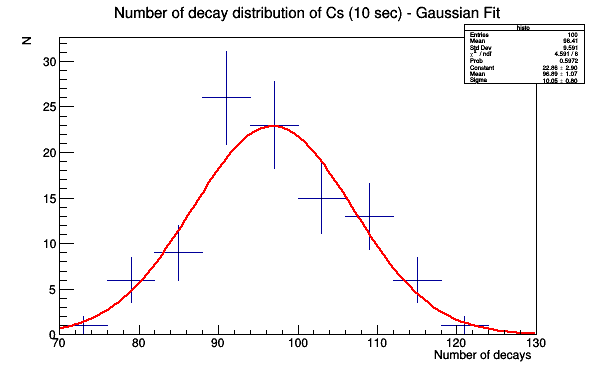

In [8]:
#Do the similar procedure for Gaussian function (which now has 3 parameters: normalization, mean, standard dev.)
fgaus = TF1("fgaus","gaus")
fgaus.SetParameters(10, 100, 5) # give reasonable estimates for your parameters to guide ROOT fit to converge
fgaus.SetFillColor(45);
histo.Fit("fgaus", "E")
histo.SetTitle("Number of decay distribution of Cs (10 sec) - Gaussian Fit")
#histo.Draw("same")
c1.Draw("same")
c1.SaveAs("cs10_1.eps")